In [1]:
from numpy import array
from numpy import mean

In [2]:
M = array([
    [1,2,3,4,5,6],
    [1,2,3,4,5,6]])
print(M)

[[1 2 3 4 5 6]
 [1 2 3 4 5 6]]


In [3]:
col_mean = mean(M, axis = 0)
print(col_mean)

[1. 2. 3. 4. 5. 6.]


In [4]:
row_mean = mean(M, axis = 1)
print(row_mean)

[3.5 3.5]


In [10]:
from numpy import var

In [11]:
v = array([1,2,3,4,5,6])
print(v)

[1 2 3 4 5 6]


In [12]:
result = var(v, ddof = 1)
print(result)

3.5


In [22]:
from numpy import cov
from numpy import corrcoef

In [15]:
x = array([1,2,3,4,5,6,7,8,9])
y = array([9,8,7,6,5,4,3,2,1])
print(x)
print(y)

[1 2 3 4 5 6 7 8 9]
[9 8 7 6 5 4 3 2 1]


In [24]:
corr = corrcoef(x,y)[0,1]
print(corr)

-1.0


In [16]:
sigma = cov(x,y) [0,1]
print(sigma)

-7.5


In [20]:
X = array([[1,5,8],
          [3,5,11],
          [2,4,9],
          [3,6,10],
          [1,5,10]])
print(X)

[[ 1  5  8]
 [ 3  5 11]
 [ 2  4  9]
 [ 3  6 10]
 [ 1  5 10]]


In [21]:
sigma = cov(X.T)
print(sigma)

[[1.   0.25 0.75]
 [0.25 0.5  0.25]
 [0.75 0.25 1.3 ]]


In [25]:
#PCA
from numpy import cov
from numpy.linalg import eig 

In [26]:
A = array([
    [1,2],
    [3,4],
    [5,6]])
print(A)

[[1 2]
 [3 4]
 [5 6]]


In [29]:
# Get the mean of each columns
col_mean = mean(A, axis = 0)
print(col1_mean)

[3. 4.]


In [30]:
# center the values in each column of A
C = A - col_mean
print(C)

[[-2. -2.]
 [ 0.  0.]
 [ 2.  2.]]


In [31]:
# covariance matrix of the centered
V = cov(C.T)
print(V)

[[4. 4.]
 [4. 4.]]


In [33]:
# calculate eigndecomposition
eig_val, eig_vect = eig(V)
print(eig_val)

[8. 0.]


In [34]:
print(eig_vect)

[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


In [37]:
# project data
P = eig_vect.T.dot(C.T)
print(P.T)

[[-2.82842712  0.        ]
 [ 0.          0.        ]
 [ 2.82842712  0.        ]]


In [38]:
from sklearn.decomposition import PCA

In [42]:
# create the transform
pca = PCA(2)
# fit transform
pca.fit(A)
# access values and vectors
print(pca.components_) # vectors
print(pca.explained_variance_) # values

[[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]]
[8.00000000e+00 2.25080839e-33]


In [43]:
# transform data
B = pca.transform(A)
print(B)

[[-2.82842712e+00  2.22044605e-16]
 [ 0.00000000e+00  0.00000000e+00]
 [ 2.82842712e+00 -2.22044605e-16]]


In [44]:
# linear regression
from matplotlib import pyplot

In [46]:
#dafine dataset
data = array([
    [0.05, 0.12],
    [0.18, 0.22],
    [0.31, 0.35],
    [0.42, 0.38],
    [0.5, 0.49]])
print(data)

[[0.05 0.12]
 [0.18 0.22]
 [0.31 0.35]
 [0.42 0.38]
 [0.5  0.49]]


In [51]:
X, y = data[:,0], data[:,1]
X = X.reshape(len(X), 1) # reshape to column vector

In [53]:
print(X)

[[0.05]
 [0.18]
 [0.31]
 [0.42]
 [0.5 ]]


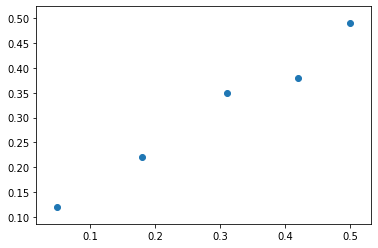

In [54]:
# scatter plot
pyplot.scatter(X,y)

In [56]:
from numpy.linalg import inv

In [57]:
# linear least square
b = inv(X.T.dot(X)).dot(X.T).dot(y)
print(b)

[1.00233226]


In [58]:
# predict using coefficients
yhat = X.dot(b)

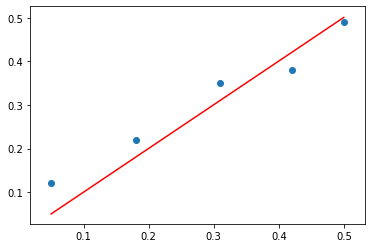

In [59]:
# plot data and predictions
pyplot.scatter(X, y)
pyplot.plot(X, yhat, color = 'red')
pyplot.show()

In [60]:
data

array([[0.05, 0.12],
       [0.18, 0.22],
       [0.31, 0.35],
       [0.42, 0.38],
       [0.5 , 0.49]])

In [62]:
# using QR decomposition to solve linear regression
from numpy.linalg import qr

In [67]:
Q,R = qr(X)
print(Q)

[[-0.06697096]
 [-0.24109545]
 [-0.41521995]
 [-0.56255606]
 [-0.6697096 ]]


In [68]:
print(R)

[[-0.74659226]]


In [69]:
b = inv(R).dot(Q.T).dot(y)
print(b)

[1.00233226]


In [70]:
 yhat = X.dot(b)

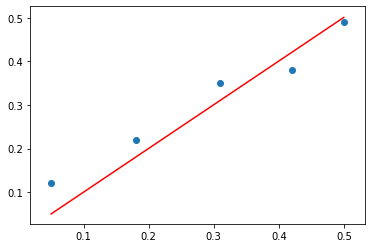

In [72]:
pyplot.scatter(X, y)
pyplot.plot(X, yhat, color = 'red')
pyplot.show()

In [73]:
# using pseudoinverse
from numpy.linalg import pinv

In [74]:
b = pinv(X).dot(y)
print(b)

[1.00233226]


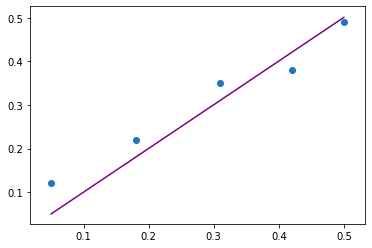

In [77]:
# prediction
yhat = X.dot(b)

# plot data and predictions
pyplot.scatter(X, y)
pyplot.plot(X, yhat, color = 'purple')
pyplot.show()

In [78]:
# using convenience function
from numpy.linalg import lstsq

In [84]:
b, residuals, rank, s = lstsq(X, y, rcond = None)
print(b)

[1.00233226]


In [85]:
print(residuals)

[0.00979697]


In [86]:
print(rank)

1


In [87]:
print(s)

[0.74659226]


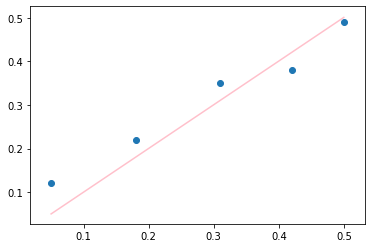

In [90]:
# predict using coeffidients
yhat = X.dot(b)
# plot data and prediction
pyplot.scatter(X, y)
pyplot.plot(X, yhat, color = 'pink')
pyplot.show()

In [91]:
# to check module version in your computer
!pip freeze

absl-py==0.8.0
alabaster==0.7.12
anaconda-client==1.7.2
anaconda-navigator==1.9.7
anaconda-project==0.8.3
asn1crypto==1.0.1
astor==0.8.0
astroid==2.3.1
astropy==3.2.1
atomicwrites==1.3.0
attrs==19.2.0
Babel==2.7.0
backcall==0.1.0
backports.functools-lru-cache==1.5
backports.os==0.1.1
backports.shutil-get-terminal-size==1.0.0
backports.tempfile==1.0
backports.weakref==1.0.post1
beautifulsoup4==4.8.0
bitarray==1.0.1
bkcharts==0.2
bleach==3.1.0
bokeh==1.3.4
boto==2.49.0
Bottleneck==1.2.1
certifi==2019.9.11
cffi==1.12.3
chardet==3.0.4
Click==7.0
cloudpickle==1.2.2
clyent==1.2.2
colorama==0.4.1
conda==4.7.12
conda-build==3.18.8
conda-package-handling==1.6.0
conda-verify==3.4.2
contextlib2==0.6.0
cryptography==2.7
cvxpy==1.0.25
cycler==0.10.0
Cython==0.29.13
cytoolz==0.10.0
dask==2.5.2
decorator==4.4.0
defusedxml==0.6.0
dill==0.3.1.1
distributed==2.5.2
docutils==0.15.2
ecos==2.0.7.post1
entrypoints==0.3
et-xmlfile==1.0.1
fastcache==1.1.0
filelock==3.0.12
Flask==1.1.1
fsspec==0.5.2
future==0.

In [2]:
import numpy as np

In [94]:
numpy.__version__

'1.17.2'

In [3]:
a = np.random.randn(3, 3)
b = np.random.randn(3, 1)
c = a*b

In [4]:
c

array([[ 0.8210161 ,  0.83162861,  1.02822396],
       [ 0.47653027,  0.63389409,  0.21103738],
       [ 0.07130939,  0.07278427, -0.03508591]])